## Machine-Learning Practicum 4 [Backpropagation]
#### Door Jelle Stiesri | 12-3-2021

#### Imports

In [1]:
from Neuron import *
from NeuronLayer import *
from NeuronNetwork import *
from timeit import default_timer as timer
import random
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Maken van een waarheidstabel

In [2]:
"""Deze functie is ervoor bedoelt om makkelijker weer te kunnen geven of een output True or False 
representeert. Dit kan alleen bij neurons waar je bijvoorbeeld een logische poort mee wilt simuleren"""

def trueORfalse(output):
    result = []
    for number in output:
        if number < 0.5:
            result.append(False)
        elif number > 0.95:
            result.append(True)
        else:
            result.append(number)
    return result

In [3]:
def create_table_data(function, expectations):
    """Deze functie berekent de uitkomst van een Neuron/netwerk en geeft dit terug in een goed format"""
    data = []

    for item in expectations:
        output = function(item[0])
        if type(output) != list:
            output = [output]
        data.append([item[0], trueORfalse(output)])
    return data


In [4]:
def print_table(data, caption):
    """Deze functie print een waarheidstabel"""
    columns = ['Input', 'Output']
    
    df = pd.DataFrame.from_records(data, columns=columns)
    print(f'<{caption}>\n {df}\n')
    

In [5]:
def classify(x):
    """Deze functie classificeert een lijst met outputs tot 1 output. Dit is de hoogste output"""
    e_x = np.exp(x - np.max(x))  # Voert het softmax algoritme uit zodat je uitkomsten beter kan classificeren
    softmax = e_x / e_x.sum(axis=0) 

    return np.where(softmax == np.amax(softmax))[0][0]  # returnt de index van de hoogste waarde


In [6]:
def test_outcome_binary_table(expectation, outcome):
    assert expectation == outcome, 'Test mislukt - Verwachting & uitkomst niet hetzelfde'
    print("Test geslaagd - Verwachting & uitkomst hetzelfde")

#### Random startwaarden

In [7]:
def generate_random_float():
    return round(random.uniform(-10, 10),1)

def generate_random_list(numbers):
    lst = []
    for item in range(numbers):
        lst.append(generate_random_float())
    
    return [float(i)/max(lst) for i in lst]

## Neurons


#### AND
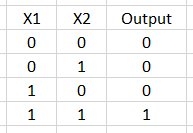


In [8]:
"""AND Test"""

n_and = Neuron('AND', generate_random_float(), generate_random_list(2))
print(n_and)

and_expectation = [[[False, False], False],  # Verwachtingen
                   [[False, True], False], 
                   [[True, False], False], 
                   [[True, True], True]]

print_table(and_expectation, 'Verwachting')

old_output = create_table_data(n_and.activation, and_expectation) 
print_table(old_output, 'Uitkomst VOOR training')

# Trainen van losse neuron
epochs = 2500
for i in range(epochs):
    random.shuffle(and_expectation)
    for input_list, expectation in and_expectation:

        output = n_and.activation(input_list)
        n_and.calculate_error_output(n_and.output, expectation)
        n_and.update(input_list, 10)

and_expectation = [[[False, False], [False]],  # Omdat de eerste dataset is geshuffled
                   [[False, True], [False]], 
                   [[True, False], [False]], 
                   [[True, True], [True]]]

new_output = create_table_data(n_and.activation, and_expectation)
print_table(new_output, 'Uitkomst Na Training')

print(n_and)

test_outcome_binary_table(and_expectation, new_output) # Test de uitkomst

<AND port>
- Bias = -8.3
- Weights = [4.304347826086957, 1.0]

<Verwachting>
             Input  Output
0  [False, False]   False
1   [False, True]   False
2   [True, False]   False
3    [True, True]    True

<Uitkomst VOOR training>
             Input   Output
0  [False, False]  [False]
1   [False, True]  [False]
2   [True, False]  [False]
3    [True, True]  [False]

<Uitkomst Na Training>
             Input   Output
0  [False, False]  [False]
1   [False, True]  [False]
2   [True, False]  [False]
3    [True, True]   [True]

<AND port>
- Bias = -13.59723420525501
- Weights = [9.008199886811449, 9.008209399082276]

Test geslaagd - Verwachting & uitkomst hetzelfde


In [9]:
"""XOR Test"""

N1 = Neuron('Neuron 1', -1, [1, 1])
N2 = Neuron('Neuron 2', -1, [0.5, 0.5])
outputNeuron = Neuron('Output Neuron', 0, [0.6, 1])

hiddenLayer = NeuronLayer('Hidden Layer', [N1, N2])
outputLayer = NeuronLayer('Output Layer', [outputNeuron])

network_xor = NeuronNetwork([hiddenLayer, outputLayer])

xor_expectation = [[[False, False], [False]],
                   [[False, True], [True]],
                   [[True, False], [True]],
                   [[True, True], [False]]]

print_table(xor_expectation, "Verwachting")

old_output = create_table_data(network_xor.feed_forward, xor_expectation)
print_table(old_output, 'Uitkomst VOOR training')

epochs = 500
learning_rate = 10
network_xor.train(xor_expectation, epochs, learning_rate) # Trainen van het netwerk

xor_expectation = [[[False, False], [False]],
                   [[False, True], [True]],
                   [[True, False], [True]],
                   [[True, True], [False]]]

new_output = create_table_data(network_xor.feed_forward, xor_expectation)
print_table(new_output, 'Uitkomst NA training')

test_outcome_binary_table(xor_expectation, new_output) # Test de uitkomst

<Verwachting>
             Input   Output
0  [False, False]  [False]
1   [False, True]   [True]
2   [True, False]   [True]
3    [True, True]  [False]

<Uitkomst VOOR training>
             Input                Output
0  [False, False]  [0.6059468015087622]
1   [False, True]  [0.6631895793149735]
2   [True, False]  [0.6631895793149735]
3    [True, True]  [0.7188238810813806]

<Uitkomst NA training>
             Input   Output
0  [False, False]  [False]
1   [False, True]   [True]
2   [True, False]   [True]
3    [True, True]  [False]

Test geslaagd - Verwachting & uitkomst hetzelfde


In [10]:
"""ADDER Test"""

N1 = Neuron('Neuron 1', 0, [1, 1])
N2 = Neuron('Neuron 2', 0, [1, 1])
N3 = Neuron('Neuron 3', 0, [1, 1])

outputNeuron1 = Neuron('Output Neuron', -1.2, [0.5, 0.1, 1])
outputNeuron2 = Neuron('Output Neuron', -1.2, [0.5, 0.15, 0.8])

hiddenLayer = NeuronLayer('Hidden Layer', [N1, N2, N3])
outputLayer = NeuronLayer('Output Layer', [outputNeuron1, outputNeuron2])

network_adder = NeuronNetwork([hiddenLayer, outputLayer])
print(network_adder)

adder_expectation = [[[False, False], [False, False]],
                   [[False, True], [True, False]],
                   [[True, False], [True, False]],
                   [[True, True], [False, True]]]

print_table(adder_expectation, "Verwachting")

old_output = create_table_data(network_adder.feed_forward, adder_expectation)
print_table(old_output, 'Uitkomst VOOR training')

epochs = 500
learning_rate = 10
network_adder.train(adder_expectation, epochs, learning_rate)

adder_expectation = [[[False, False], [False, False]],
                   [[False, True], [True, False]],
                   [[True, False], [True, False]],
                   [[True, True], [False, True]]]



new_output = create_table_data(network_adder.feed_forward, adder_expectation)
print_table(new_output, 'Uitkomst NA training')


test_outcome_binary_table(adder_expectation, new_output)

----------------------------------------
Dit netwerk bestaat uit 2 layers

<Verwachting>
             Input          Output
0  [False, False]  [False, False]
1   [False, True]   [True, False]
2   [True, False]   [True, False]
3    [True, True]   [False, True]

<Uitkomst VOOR training>
             Input                                   Output
0  [False, False]                           [False, False]
1   [False, True]                           [False, False]
2   [True, False]                           [False, False]
3    [True, True]  [0.5521287167773176, 0.519279377518996]

<Uitkomst NA training>
             Input          Output
0  [False, False]  [False, False]
1   [False, True]   [True, False]
2   [True, False]   [True, False]
3    [True, True]   [False, True]

Test geslaagd - Verwachting & uitkomst hetzelfde


## IRIS dataset


In [11]:
def create_table_data_iris(function, expectations):
    data = []
    outputs = []

    for item in expectations:
        output = function(item[0])
        outputs.append(classify(output))
        data.append([item[0], classify(output)])
#         data.append([item[0], output])
    return data, outputs


In [12]:
from sklearn.datasets import load_iris

data = load_iris(as_frame=True)
data['data']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
"""Train / Test Split"""
features_train, features_test, targets_train, targets_test = train_test_split(data['data'], data['target'], test_size=0.33, shuffle = True)

targets_train = pd.get_dummies(targets_train).values.tolist() 
features_train = features_train.values.tolist()
features_test = features_test.values.tolist()

In [14]:
train_iris = [list(x) for x in zip(features_train, targets_train)]
test_iris = [list(x) for x in zip(features_test, targets_test)]

In [15]:
"""IRIS Test"""

N1 = Neuron('Neuron 1', 0, [0.2, 0.4, 0.6, 0.8])
N2 = Neuron('Neuron 2', 0, [0.2, 0.4, 0.6, 0.8])
N3 = Neuron('Neuron 3', 0, [0.2, 0.4, 0.6, 0.8])


outputNeuron1 = Neuron('outputNeuron 1', 0,  [0.0, 0.1, 0.2])
outputNeuron2 = Neuron('outputNeuron 2', 0,  [0.3, 0.4, 0.5])
outputNeuron3 = Neuron('outputNeuron 3', 0,  [0.6, 0.7, 0.8])


hiddenLayer1 = NeuronLayer('Hidden Layer1', [N1, N2, N3])
outputLayer = NeuronLayer('Output Layer', [outputNeuron1, outputNeuron2, outputNeuron3])

network_iris = NeuronNetwork([hiddenLayer1, outputLayer])
print(network_iris)


# print_table(test_iris, "Verwachting")

old_output, old_outputs = create_table_data_iris(network_iris.feed_forward, test_iris)
# print_table(old_output, 'Uitkomst VOOR training')
print(f'Score [Voor training]: <{accuracy_score(list(targets_test), old_outputs)}>\n')


network_iris.train(train_iris, 200, 0.1)

new_output, new_outputs = create_table_data_iris(network_iris.feed_forward, test_iris)
# print_table(new_output, 'Uitkomst NA training')
print(f'Score [Na training]: <{accuracy_score(list(targets_test), new_outputs)}>\n')


----------------------------------------
Dit netwerk bestaat uit 2 layers

Score [Voor training]: <0.34>

Score [Na training]: <0.9>



Ik weet uiteindelijk een score van (vaak) 90% te halen, Toen ik eerst ging testen met startwaardes van bijvoorbeeld 1 was dit een stuk lager, dit doet dus blijken dat het naast een correct werkten leeralgoritme ook belangrijk is om de startwaardes goed te kiezen.

## Digit dataset


In [16]:
digits = datasets.load_digits()
n_samples = len(digits.images)
data_digits = digits.images.reshape((n_samples, -1))
targets_digits = digits.target

In [17]:
"""Test / Train Split"""
features_train, features_test, targets_train, targets_test = train_test_split(data_digits, targets_digits, test_size=0.33, shuffle = True)

targets_train = pd.get_dummies(targets_train).values.tolist() 

In [18]:
train_digit = [list(x) for x in zip(features_train, targets_train)]
test_digit = [list(x) for x in zip(features_test, targets_test)]


In [19]:
"""Digit Test"""

hiddenNeurons = []
for i in range(25): 
    hiddenNeurons.append(Neuron(f'hiddenNeuron {i}', 0, generate_random_list(64)))

outputNeurons = []
for i in range(10): # Er zijn 10 mogelijk targets
    outputNeurons.append(Neuron(f'outputNeuron {i}', 0, generate_random_list(25)))

hiddenLayer1 = NeuronLayer('Hidden Layer 1', hiddenNeurons)
print(hiddenLayer1)
outputLayer = NeuronLayer('Output Layer', outputNeurons)
print(outputLayer)

network_digit = NeuronNetwork([hiddenLayer1, outputLayer])
print(network_digit)


# print_table(test, "Verwachting")

old_output, old_outputs = create_table_data_iris(network_digit.feed_forward, test_digit)
# print_table(old_output, 'Uitkomst VOOR training')
print(f'Score [Voor training]: <{accuracy_score(list(targets_test), old_outputs)}>\n')

epochs = 15
learning_rate = 0.5

start = timer()
network_digit.train(train_digit, epochs, learning_rate)
elapsed_time = timer() - start
print(f'Het trainen van het Digit-Network met {epochs} epochs een een learning rate van {learning_rate} duurde:\n >{round(elapsed_time,2)} Seconden\n')

new_output, new_outputs = create_table_data_iris(network_digit.feed_forward, test_digit)
# print_table(new_output, 'Uitkomst NA training')
print(f'Score [Na training]: <{accuracy_score(list(targets_test), new_outputs)}>\n')



----------------------------------------
<Hidden Layer 1> - Deze layer bestaat uit 25 neurons

----------------------------------------
<Output Layer> - Deze layer bestaat uit 10 neurons

----------------------------------------
Dit netwerk bestaat uit 2 layers

Score [Voor training]: <0.02356902356902357>



D:\HU-Studie\Machine-Learning\Machine-Learning\P4\Neuron.py:25: RuntimeWarning: overflow encountered in double_scalars
  return 1 / (1 + e ** -weighted_sum)


Het trainen van het Digit-Network met 15 epochs een een learning rate van 0.5 duurde:
 >43.45 Seconden

Score [Na training]: <0.7407407407407407>



## Conlusie: 
Het trainen van een (nog relatief simpel) Netwerk kost veel tijd. Wel weet ik met de digit dataset soms een score van meer dan 75% te halen (ligt aan de test/train split & random gekozen parameters...)